In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_path = r'C:\Users\shour\Downloads\TensorFlow_FILES\TensorFlow_FILES\DATA\cancer_classification.csv'

df = pd.read_csv(file_path)

In [4]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: xlabel='benign_0__mal_1', ylabel='count'>

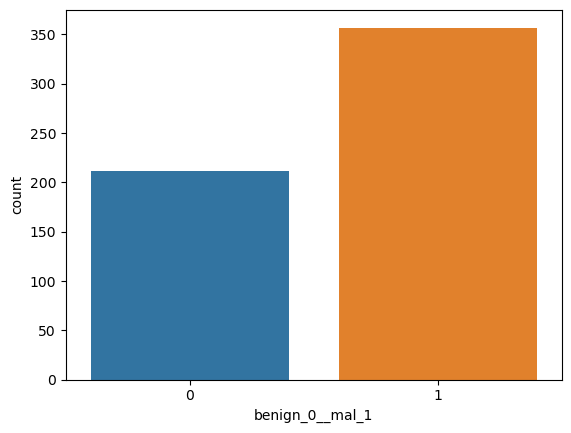

In [6]:
sns.countplot(x= 'benign_0__mal_1', data = df)

<Axes: >

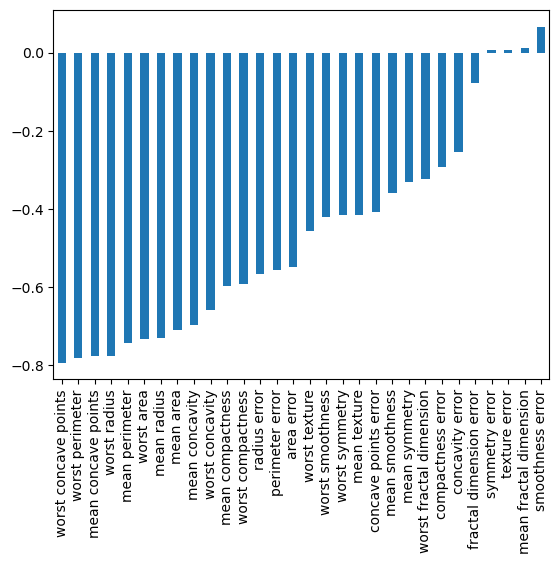

In [10]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind = 'bar')

<Axes: >

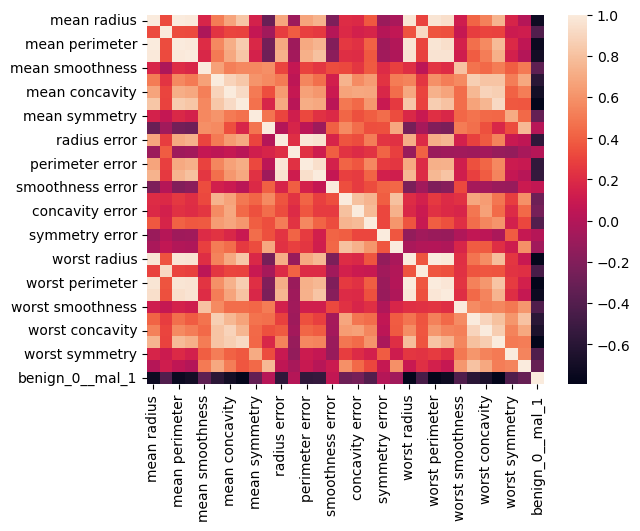

In [12]:
sns.heatmap(df.corr())

In [14]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test =scaler.fit_transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense, Dropout

In [23]:
X_train.shape

(426, 30)

In [26]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))

#BinaryClassification last nuron = sigmoid

model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer = 'adam')

In [27]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data= (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 25ms/step - loss: 0.6906 - val_loss: 0.6715
Epoch 2/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6569 - val_loss: 0.6406
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6213 - val_loss: 0.5996
Epoch 4/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5811 - val_loss: 0.5585
Epoch 5/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5367 - val_loss: 0.5073
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4850 - val_loss: 0.4589
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.4325 - val_loss: 0.4050
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3804 - val_loss: 0.3500
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3338 - val_loss: 0.3121
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.2994 - val_loss: 0.2775
Epoch 11

14/14 [==============================] - 0s 7ms/step - loss: 0.0563 - val_loss: 0.2255
Epoch 84/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0564 - val_loss: 0.2611
Epoch 85/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0597 - val_loss: 0.2550
Epoch 86/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0618 - val_loss: 0.2447
Epoch 87/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0616 - val_loss: 0.2725
Epoch 88/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0648 - val_loss: 0.2510
Epoch 89/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0692 - val_loss: 0.3482
Epoch 90/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0613 - val_loss: 0.2272
Epoch 91/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0576 - val_loss: 0.2958
Epoch 92/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0536 - val_loss: 0.2322
Epoch 93/600


14/14 [==============================] - 0s 6ms/step - loss: 0.0402 - val_loss: 0.4430
Epoch 165/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0435 - val_loss: 0.3579
Epoch 166/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0422 - val_loss: 0.3641
Epoch 167/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0424 - val_loss: 0.3848
Epoch 168/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0435 - val_loss: 0.3824
Epoch 169/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0410 - val_loss: 0.3691
Epoch 170/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0415 - val_loss: 0.3303
Epoch 171/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0415 - val_loss: 0.3850
Epoch 172/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0410 - val_loss: 0.3482
Epoch 173/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0402 - val_loss: 0.4091
Epoc

14/14 [==============================] - 0s 8ms/step - loss: 0.0310 - val_loss: 0.5337
Epoch 246/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0295 - val_loss: 0.4626
Epoch 247/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0302 - val_loss: 0.4876
Epoch 248/600
14/14 [==============================] - 0s 8ms/step - loss: 0.0291 - val_loss: 0.4820
Epoch 249/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0293 - val_loss: 0.5190
Epoch 250/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0285 - val_loss: 0.4758
Epoch 251/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0307 - val_loss: 0.4753
Epoch 252/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0300 - val_loss: 0.4824
Epoch 253/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0311 - val_loss: 0.4583
Epoch 254/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0303 - val_loss: 0.5121
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0242 - val_loss: 0.6287
Epoch 327/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0214 - val_loss: 0.5557
Epoch 328/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0219 - val_loss: 0.5807
Epoch 329/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0276 - val_loss: 0.4675
Epoch 330/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0223 - val_loss: 0.5910
Epoch 331/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.5447
Epoch 332/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0202 - val_loss: 0.6035
Epoch 333/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.5410
Epoch 334/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0201 - val_loss: 0.5759
Epoch 335/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0196 - val_loss: 0.5642
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0157 - val_loss: 0.5962
Epoch 408/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0141 - val_loss: 0.6609
Epoch 409/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0135 - val_loss: 0.6699
Epoch 410/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0134 - val_loss: 0.6297
Epoch 411/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0156 - val_loss: 0.7358
Epoch 412/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0170 - val_loss: 0.5804
Epoch 413/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0143 - val_loss: 0.6401
Epoch 414/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0133 - val_loss: 0.6757
Epoch 415/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0131 - val_loss: 0.6607
Epoch 416/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0141 - val_loss: 0.6632
Epoc

14/14 [==============================] - 0s 7ms/step - loss: 0.0095 - val_loss: 0.8322
Epoch 489/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0088 - val_loss: 0.6447
Epoch 490/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0106 - val_loss: 0.8586
Epoch 491/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0105 - val_loss: 0.6574
Epoch 492/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0119 - val_loss: 0.8839
Epoch 493/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0094 - val_loss: 0.6735
Epoch 494/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0108 - val_loss: 0.7794
Epoch 495/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0096 - val_loss: 0.7616
Epoch 496/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.7491
Epoch 497/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0094 - val_loss: 0.7870
Epoc

14/14 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.9343
Epoch 570/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.8863
Epoch 571/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.7992
Epoch 572/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0067 - val_loss: 0.8402
Epoch 573/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0064 - val_loss: 0.9722
Epoch 574/600
14/14 [==============================] - 0s 6ms/step - loss: 0.0061 - val_loss: 0.8099
Epoch 575/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0062 - val_loss: 1.0264
Epoch 576/600
14/14 [==============================] - 0s 7ms/step - loss: 0.0104 - val_loss: 0.7900
Epoch 577/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0073 - val_loss: 0.8222
Epoch 578/600
14/14 [==============================] - 0s 5ms/step - loss: 0.0086 - val_loss: 1.0518
Epoc

In [28]:
losses = pd.DataFrame(model.history.history)

<Axes: >

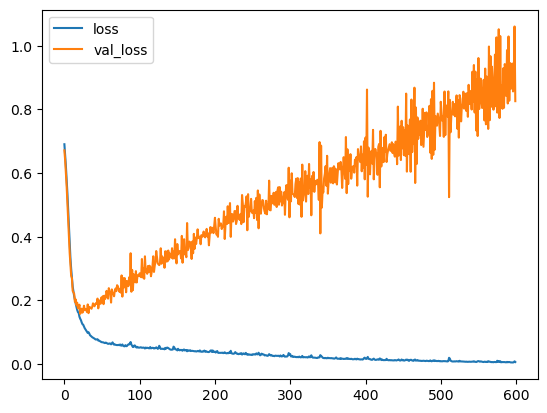

In [29]:
losses.plot()

In [30]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))

model.add(Dense(15, activation = 'relu'))


model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer = 'adam')

In [32]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
#help(EarlyStopping)

In [37]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience =25)

In [38]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data= (X_test, y_test),
         callbacks =[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.6737 - val_loss: 0.6476
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6333 - val_loss: 0.6148
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5971 - val_loss: 0.5762
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5540 - val_loss: 0.5203
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5009 - val_loss: 0.4580
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.4470 - val_loss: 0.4001
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.3970 - val_loss: 0.3512
Epoch 8/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3581 - val_loss: 0.3137
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3215 - val_loss: 0.2840
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2933 - val_loss: 0.2628
Epoch 11

<Axes: >

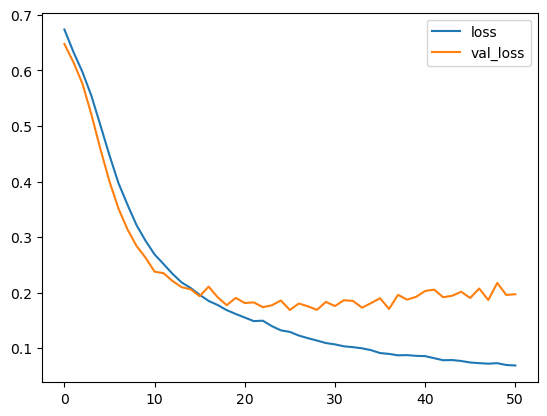

In [39]:
model_loss = pd.DataFrame(model.history.history)

model_loss.plot()

In [41]:
from tensorflow.keras.layers import Dropout

In [43]:
model = Sequential()

model.add(Dense(30, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation = 'relu'))
model.add(Dropout(0.5))


model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss ='binary_crossentropy', optimizer = 'adam')

In [44]:
model.fit(x= X_train, y = y_train, epochs = 600, validation_data= (X_test, y_test),
         callbacks =[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 22ms/step - loss: 0.6906 - val_loss: 0.6631
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6844 - val_loss: 0.6439
Epoch 3/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6699 - val_loss: 0.6271
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6515 - val_loss: 0.6095
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6376 - val_loss: 0.5885
Epoch 6/600
14/14 [==============================] - 0s 7ms/step - loss: 0.6176 - val_loss: 0.5642
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.5966 - val_loss: 0.5333
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5720 - val_loss: 0.5142
Epoch 9/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5398 - val_loss: 0.4898
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5518 - val_loss: 0.4526
Epoch 11

In [45]:
model_loss = pd.DataFrame(model.history.history
                         )

<Axes: >

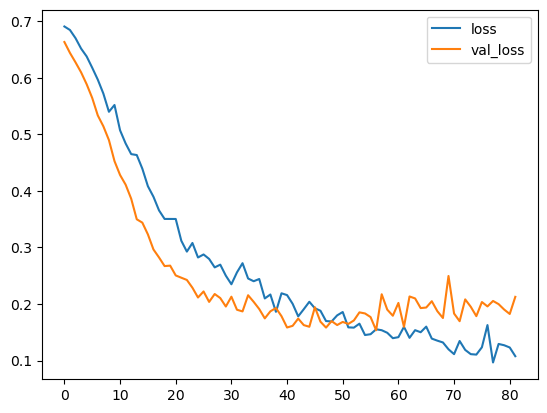

In [46]:
model_loss.plot()

In [47]:
predictions = model.predict_classes(X_test)

AttributeError: 'Sequential' object has no attribute 'predict_classes'